# Kaggle Titanic Problem

### Using logistic regression 

## Import the libraries 


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Xzane/Priyesh/Courses - Training materials/Simplilearn/Machine Learning/class notes,ppt,ipynb,datasets,etc/Supervised-Regression/4#logistic/2#scikit-example-project/titanic_train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the variables Age, Cabin and Embarked have few null values. As Embarked has only 2 missing values so no need
to fill them. So imputaion or drop/replace the data - may be reqd for the significant variables. 
Imputation -- mean/median/Arbitary/Rare value

TO Know the significant varibles, lets do some plotting

<AxesSubplot:xlabel='Survived', ylabel='count'>

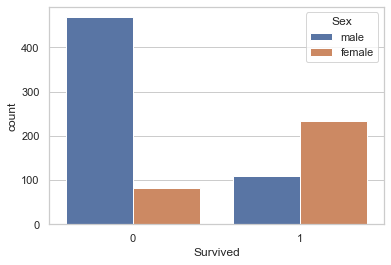

In [7]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

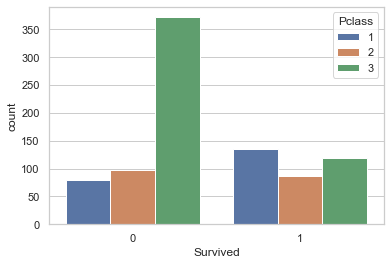

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Survived',hue='Pclass')

<AxesSubplot:xlabel='Age'>

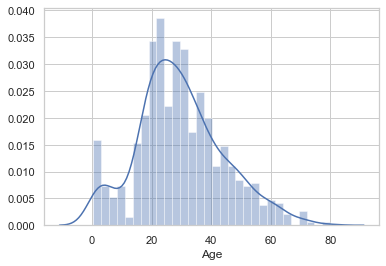

In [9]:
sns.distplot(df['Age'],bins=30)

<AxesSubplot:xlabel='Age'>

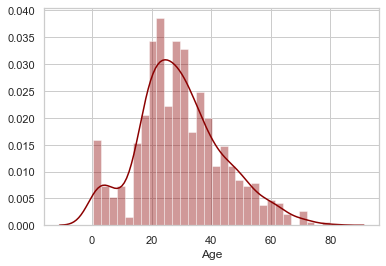

In [10]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkred',bins=30)

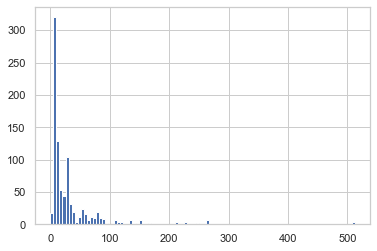

In [11]:
df['Fare'].hist(bins=100);

In [12]:
# Before doing Imputation, use boxplot to see the outliers and remember that the middleline in the boxplot is mean not
# median 

In [13]:
# Analysing Value for missing fields in Age, grouping on Pclass

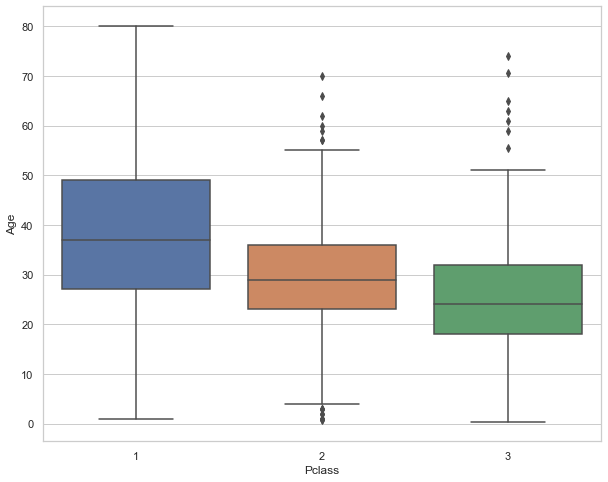

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Pclass', y='Age');

In [15]:
# Mean of age grouped by Pclass
df.groupby(['Pclass']).mean()[['Age']]

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [16]:
# Median of age grouped by Pclass
Med_age = df.groupby(['Pclass']).median()[['Age']]
type(Med_age)
Med_age

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [17]:
# Define a function for imputation(fillna/replace) or use lambda 

df['Age'] = df.groupby(['Pclass'])[['Age']].transform(lambda x: x.fillna(x.median()))

#df['Age'] = df['Age'].fillna((df.groupby(['Pclass']).median()[['Age']]),inplace=True)

In [18]:
df.isnull().sum() #-- Now observe that all the NaN/Null values are 0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Since no clear data is given about 'Cabin' column to drop it
df.drop(['Cabin'],axis=1,inplace=True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [23]:
df.groupby('Fare')['Embarked']

<AxesSubplot:xlabel='Embarked', ylabel='count'>

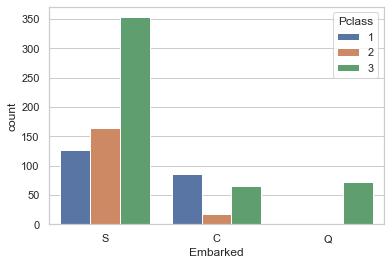

In [24]:
sns.countplot(data=df,x='Embarked',hue='Pclass')

In [25]:
# since i am not sure which value to place for 2 NULL spaces in 'Embarked' column, i will use get_dummies() to achieve that.

In [26]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### drop object columns

In [28]:
df.drop(['Sex','Ticket','Name','Embarked'],axis=1,inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
# join the sex and embarked col with the new dataframe using concat

df=pd.concat([df,sex,embarked],axis=1)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [38]:
### Time to build Logistic reg. model
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [39]:
#x=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male', 'Q', 'S']] another way is below
x=df.drop('Survived',axis=1)
y=df[['Survived']]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
lr = LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

C:\Users\priye\Anaconda3\envs\python_3.7\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\priye\Anaconda3\envs\python_3.7\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
prediction=lr.predict(x_test)

In [53]:
y_pred = prediction

In [49]:
# Now lets do the Evaluation

In [60]:
print('\n Confusion Matrix:\n ', metrics.confusion_matrix(y_test,y_pred))
print('\n Classification Report:\n ', metrics.classification_report(y_test,prediction))
print('\n Accuracy Score: ', metrics.accuracy_score(y_test,prediction))


 Confusion Matrix:
  [[136  21]
 [ 35  76]]

 Classification Report:
                precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.78      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


 Accuracy Score:  0.7910447761194029


### still try to increase the accuracy of model by takingthe cols['SibSp', 'Parch'] 